# House Prices: Linear Regression

# Step I: Remember
I am trying to implement here the single-variate linear regression, so I have to pick one feature and the label is the price. For that, just to follow from the provider of the dataset - the book `Grokking Machine Learning`, I will choose number of bedrooms as the feature.

I will do two things in this part.
- Define the types to be used in this file
- Import and prepare the data

In [1]:
from typing import List, Tuple
import random

Feature = float
Label = float
Dataset = List[Tuple[Feature, Label]]
LearningRate = float
Epoch = int

In [2]:
import csv

with open('diamonds.csv', mode='r') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    data = list(csv_reader)

# Step II: Formulate

In [7]:
class LinearRigression:
    def __init__(self, dataset: Dataset, learning_rate: LearningRate, epochs: Epoch) -> None:
        self.dataset = dataset
        self.learning_rate = learning_rate
        self.epochs = epochs
    
    def linear_regression(self) -> None:
        weight = random.random()
        bias = random.random()

        for _ in range(self.epochs):
            feature, label = random.choice(self.dataset)

            weight, bias = self.__square_loss(weight, bias, feature, label)
        
        return weight, bias
    
    def __square_loss(self, weight: float, bias: float, feature: Feature, label: Label) -> Tuple[float, float]:
        predicted = weight * feature + bias
        error = predicted - label

        weight -= (self.learning_rate * error * feature)
        bias -= (self.learning_rate * error)

        return weight, bias
    
    def __absolute_loss(self, weight: float, bias: float, feature: Feature, label: Label) -> Tuple[float, float]:
        predicted = weight * feature + bias

        if predicted > label:
            weight += (self.learning_rate * feature)
            bias += self.learning_rate
        else:
            weight -= (self.learning_rate * feature)
            bias -= self.learning_rate

        return weight, bias

# Step III: Predict
Now, with the weight of the feature and the bias know, just predict prices given the no. of bedrooms.

In [8]:
def predict(slope: float, intercept: float, feature: Feature) -> Label:
    return slope * feature + intercept

# Demonstration

In [21]:
dataset: Dataset = list(zip([float(d['carat']) for d in data], [float(d['price']) for d in data]))
training_set_size = int(0.8 * len(dataset))

training_set = dataset[:training_set_size]
test_set = dataset[training_set_size:]

# Uncomment the following lines to test the algorithm with a small dataset
# training_set = list(zip([1,2,3,5,6,7], [155, 197, 244, 356,407,448]))

house_price_prediction = LinearRigression(training_set, 0.1, 10_000)
slope, intercept = house_price_prediction.linear_regression()
print(slope, intercept)

correct_predictions, incorrect_predictions = 0, 0
for feature, label in test_set:
    predicted = predict(slope, intercept, feature)

    if abs(predicted - label) < 1000:
        correct_predictions += 1
    else:
        incorrect_predictions += 1

print(f'Accuracy: {round(correct_predictions / (correct_predictions + incorrect_predictions), 5) * 100}%')

7802.334428647207 -2724.2506687517493
Accuracy: 88.228%


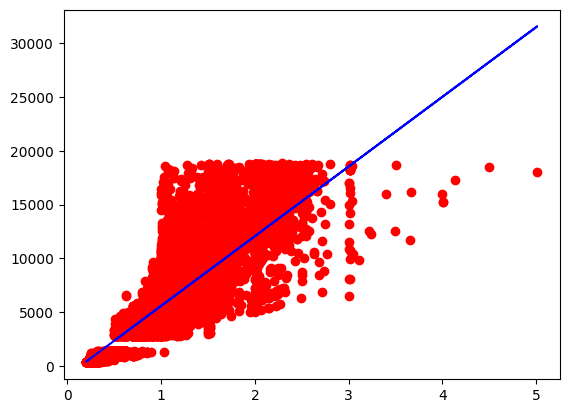

In [10]:
# Ploting the graph
import matplotlib.pyplot as plt

# plot the training set
plt.scatter([feature for feature, label in training_set], [label for feature, label in training_set], color='red')

# plot the slope and intercept
plt.plot([feature for feature, label in training_set], [predict(slope, intercept, feature) for feature, label in training_set], color='blue')